In [146]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/used-bikes-prices-in-india/Used_Bikes.csv


In [147]:
#Modules for EDA
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
%matplotlib inline

In [336]:
#Machine learning packages
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
import joblib

In [339]:
df = pd.read_csv('../input/used-bikes-prices-in-india/Used_Bikes.csv')
df.shape

(32648, 8)

In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [150]:
df.isna().sum()

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [151]:
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [353]:
df.drop('bike_name',axis=1,inplace=True)

# **Let's Figure Out unique bike brands**

In [341]:
df['brand'].value_counts()

Bajaj              11213
Hero                6368
Royal Enfield       4178
Yamaha              3916
Honda               2108
Suzuki              1464
TVS                 1247
KTM                 1077
Harley-Davidson      737
Kawasaki              79
Hyosung               64
Benelli               56
Mahindra              55
Triumph               26
Ducati                22
BMW                   16
Jawa                  10
MV                     4
Indian                 3
Ideal                  2
Rajdoot                1
Yezdi                  1
LML                    1
Name: brand, dtype: int64

# **Replacing Bike brands to others which are less than 1000**

In [342]:
brands = df['brand'].value_counts()
bike_brands_less_than_100 = brands[brands<=1000]
bike_brands_less_than_100

Harley-Davidson    737
Kawasaki            79
Hyosung             64
Benelli             56
Mahindra            55
Triumph             26
Ducati              22
BMW                 16
Jawa                10
MV                   4
Indian               3
Ideal                2
Rajdoot              1
Yezdi                1
LML                  1
Name: brand, dtype: int64

In [343]:
print("Other brands total",sum(bike_brands_less_than_100))

Other brands total 1077


In [344]:
others = bike_brands_less_than_100.keys()
others

Index(['Harley-Davidson', 'Kawasaki', 'Hyosung', 'Benelli', 'Mahindra',
       'Triumph', 'Ducati', 'BMW', 'Jawa', 'MV', 'Indian', 'Ideal', 'Rajdoot',
       'Yezdi', 'LML'],
      dtype='object')

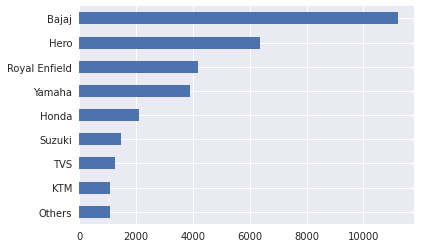

In [346]:
df['brand'].replace(others,"Others",inplace=True)
df['brand'].value_counts().plot(kind="barh")
plt.gca().invert_yaxis()
plt.show()

In [347]:
bike_groups = df.groupby('brand')

In [348]:
def get_average_plot_data(col,scale=None):
    brands = df['brand'].unique()
    avgs = []
    for brand in brands:
        average = bike_groups.get_group(brand)[col].mean()
        avgs.append(average)
    df1 = pd.DataFrame({"Brand":brands,f"Average {col}":avgs})
    
    x = df1[df1.columns[1]]
    y = df1[df1.columns[0]]
    sns.barplot(data=df1,x=x,y=y)
    plt.title(f"Average {col} of various brands")
    if scale:
        plt.xscale(scale)
    plt.show()

# **Average age of each bike brand**

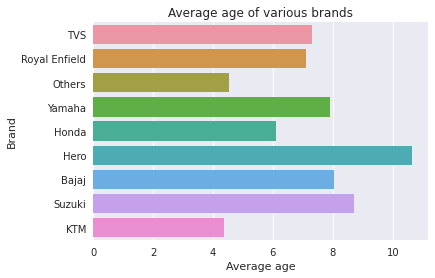

In [349]:
get_average_plot_data('age')

# **Average price of each bike brand**

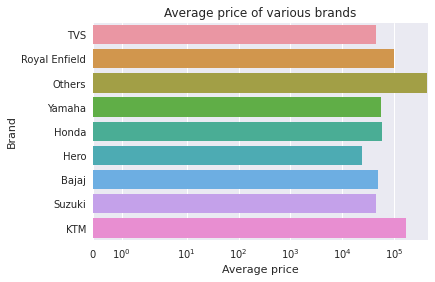

In [350]:
get_average_plot_data('price','symlog')

# **Average KMs driven of each bike brand**

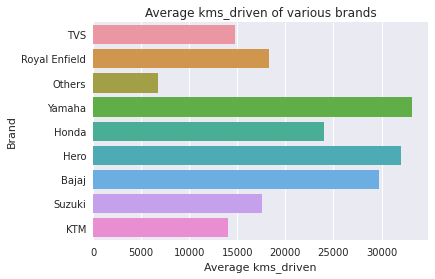

In [351]:
get_average_plot_data('kms_driven')

# **Average power of each bike brand**

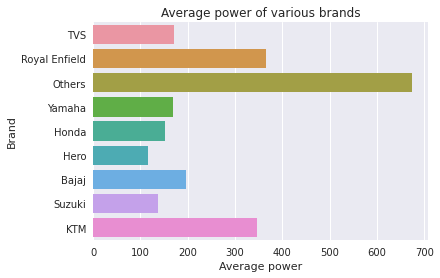

In [352]:
get_average_plot_data('power')

# **Pair Plot**

<Figure size 720x720 with 0 Axes>

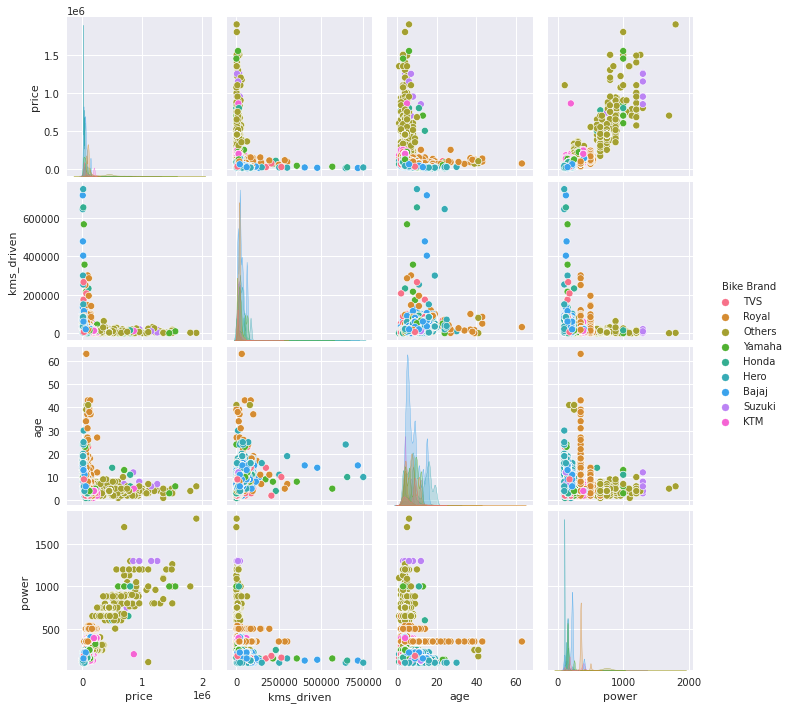

In [168]:
cols_to_plot = ['brand', 'price', 'kms_driven', 'age', 'power']
plt.figure(figsize=(10,10))
sns.pairplot(df[cols_to_plot], hue='brand')
plt.show()

# **City Counts**

In [169]:
df['city'].value_counts()

Delhi          7318
Bangalore      2723
Mumbai         2591
Hyderabad      2160
Pune           1724
               ... 
Uluberia          1
Thanjavur         1
Phagwara          1
Tiruverkadu       1
Gangtok           1
Name: city, Length: 443, dtype: int64

# **Popular cities**

In [170]:
city_counts = df['city'].value_counts()
city_counts[city_counts>=500]

Delhi                  7318
Bangalore              2723
Mumbai                 2591
Hyderabad              2160
Pune                   1724
Chennai                1619
Lucknow                1294
Jaipur                 1007
Ghaziabad               938
Ahmedabad               905
Noida                   776
Bhopal                  651
Gautam Buddha Nagar     649
Kanchipuram             640
Jodhpur                 635
Karnal                  625
Rupnagar                621
Allahabad               621
Gurgaon                 617
Godhara                 611
Faridabad               609
Perumbavoor             608
Kadapa                  608
Name: city, dtype: int64

# **Setting cities to others where city frequency is < 500**

In [171]:
other_cities = city_counts[city_counts<500]
df['city'].replace(other_cities.keys(),'Others',inplace=True)

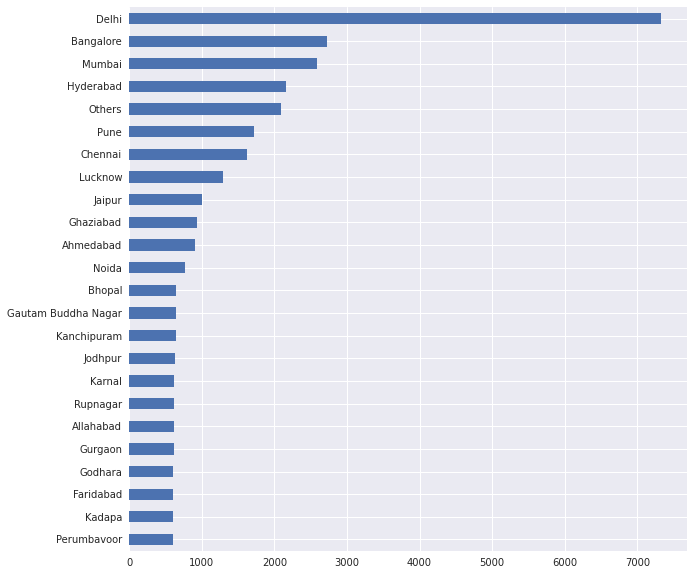

In [174]:
plt.figure(figsize=(10,10))
df['city'].value_counts().plot(kind='barh')
plt.gca().invert_yaxis()
plt.show()

In [354]:
df.head()

,price,city,kms_driven,owner,age,power,brand
0,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,600000.0,Delhi,110.0,First Owner,8.0,675.0,Others
3,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [355]:
df['owner'].value_counts()

First Owner             29964
Second Owner             2564
Third Owner               108
Fourth Owner Or More       12
Name: owner, dtype: int64

In [356]:
df['owner'].replace(['Second Owner','Third Owner','Fourth Owner Or More'],'Second Owner or more',inplace=True)
df['owner'].value_counts()

First Owner             29964
Second Owner or more     2684
Name: owner, dtype: int64

# **Feature Engineering**

## **One Hot encoding**

In [357]:
cols_to_encode = ['brand', 'city', 'owner']
dummies = pd.get_dummies(df[cols_to_encode],drop_first=True)
dummies.sample(10)

,brand_Hero,brand_Honda,brand_KTM,brand_Others,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Yamaha,city_Abohar,city_Adalaj,...,city_Virar,city_Virudhunagar,city_Visakhapatnam,city_Vizianagaram,city_Warangal,city_Wardha,city_Yamuna Nagar,city_Yemmiganur,city_Zirakpur,owner_Second Owner or more
3368,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13982,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9927,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13743,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
136,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15175,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28088,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
26269,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2764,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **Feature Scaling** 

In [358]:
cols_to_scale = ['kms_driven', 'age', 'power']
scale = MinMaxScaler()
scalled = scale.fit_transform(df[cols_to_scale])

In [359]:
i = 0
for col in cols_to_scale:
    df[col] = scalled[:,i]
    i += 1

In [360]:
df.head()

,price,city,kms_driven,owner,age,power,brand
0,35000.0,Ahmedabad,0.023537,First Owner,0.032258,0.005882,TVS
1,119900.0,Delhi,0.014665,First Owner,0.048387,0.147059,Royal Enfield
2,600000.0,Delhi,0.000145,First Owner,0.112903,0.338235,Others
3,65000.0,Bangalore,0.021771,First Owner,0.048387,0.047059,TVS
4,80000.0,Bangalore,0.013332,First Owner,0.032258,0.029412,Yamaha


In [361]:
df.drop(cols_to_encode,axis=1,inplace=True)
df.head()

,price,kms_driven,age,power
0,35000.0,0.023537,0.032258,0.005882
1,119900.0,0.014665,0.048387,0.147059
2,600000.0,0.000145,0.112903,0.338235
3,65000.0,0.021771,0.048387,0.047059
4,80000.0,0.013332,0.032258,0.029412


In [362]:
new_df = pd.concat([dummies,df],axis=1)
new_df.shape

(32648, 455)

In [363]:
new_df.head()

,brand_Hero,brand_Honda,brand_KTM,brand_Others,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Yamaha,city_Abohar,city_Adalaj,...,city_Warangal,city_Wardha,city_Yamuna Nagar,city_Yemmiganur,city_Zirakpur,owner_Second Owner or more,price,kms_driven,age,power
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,35000.0,0.023537,0.032258,0.005882
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,119900.0,0.014665,0.048387,0.147059
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,600000.0,0.000145,0.112903,0.338235
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,65000.0,0.021771,0.048387,0.047059
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,80000.0,0.013332,0.032258,0.029412


In [365]:
sum(new_df.isna().sum())

0

# **Splitting and Training data**

In [205]:
x ,y = new_df.drop(['price'],axis=1), new_df['price']
x.shape, y.shape

((32648, 35), (32648,))

In [366]:
y.head()

0     35000.0
1    119900.0
2    600000.0
3     65000.0
4     80000.0
Name: price, dtype: float64

In [378]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [397]:
x_train.shape, x_test.shape

((22853, 35), (9795, 35))

In [398]:
y_train.shape, y_test.shape

((22853,), (9795,))

# **Model Building and predictions**

In [379]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [380]:
model.score(x_test,y_test)

0.885881269891976

In [381]:
model.score(x_train,y_train)

0.8802230658555902

# **That's a descent score**

# **Cross Validation scores**

In [382]:
models = [LinearRegression(), Ridge(), Lasso(), KNeighborsRegressor()]

In [383]:
mean_scores = []
for model in models:
    print("Model:",model)
    cv_scores = cross_val_score(model, x, y, cv=5)
    print("Cross Val Scores:",cv_scores)
    print("Mean score:", cv_scores.mean())
    mean_scores.append(cv_scores.mean())
    print('\n')

Model: LinearRegression()
Cross Val Scores: [0.78148315 0.80554416 0.98301047 0.98305964 0.98294341]
Mean score: 0.9072081648578079


Model: Ridge()
Cross Val Scores: [0.77389962 0.80554337 0.984109   0.98415319 0.9840479 ]
Mean score: 0.9063506169195401


Model: Lasso()
Cross Val Scores: [0.78135153 0.80557079 0.98299968 0.98304711 0.98293409]
Mean score: 0.9071806429224385


Model: KNeighborsRegressor()
Cross Val Scores: [0.62562957 0.81823238 1.         1.         1.        ]
Mean score: 0.8887723889120988




In [384]:
mds = []
for i in range(len(models)):
    mds.append(str(models[i]))
mds

['LinearRegression()', 'Ridge()', 'Lasso()', 'KNeighborsRegressor()']

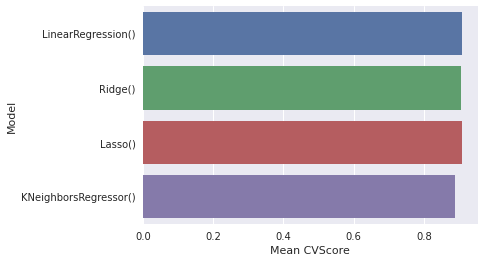

In [385]:
mean_df = pd.DataFrame({'Model':mds, 'Mean CVScore':mean_scores})
sns.barplot(data=mean_df,y='Model', x='Mean CVScore')
plt.show()

In [221]:
svm_model = SVR()
svm_model.fit(x_train,y_train)
svm_model.score(x_test,y_test)

-0.07481556478926232

In [387]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred_test = model.predict(x_test)
mean_squared_error(y_test, y_pred_test)

945770159.2962914

# **Actual vs Predicted**

In [388]:
def actual_vs_predicted(model,data,y_true,title=None):
    pred = model.predict(data)
    apdf = pd.DataFrame({'Actual':y_true, 'Predicted':np.round(pred)})
    plt.figure(figsize=(10, 10))
    sns.scatterplot(data=apdf, x='Actual', y='Predicted') 
    plt.title(title)
    plt.show()

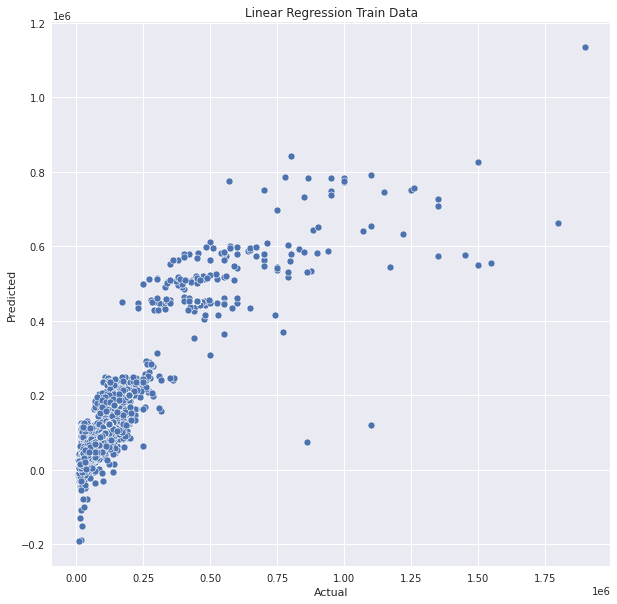

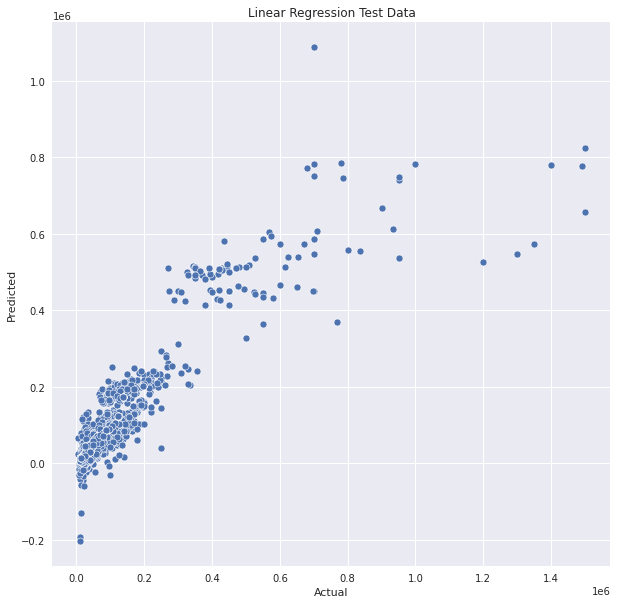

In [399]:
actual_vs_predicted(model,x_test,y_test,'Linear Regression Test Data')

# **Let's use RandomForestRegressor**

In [400]:
rfr_model = RandomForestRegressor()
rfr_model.fit(x_train, y_train)

RandomForestRegressor()

In [401]:
rfr_model.score(x_test, y_test)

0.9543802235419382

In [402]:
rfr_model.score(x_train, y_train)

0.992427090503369

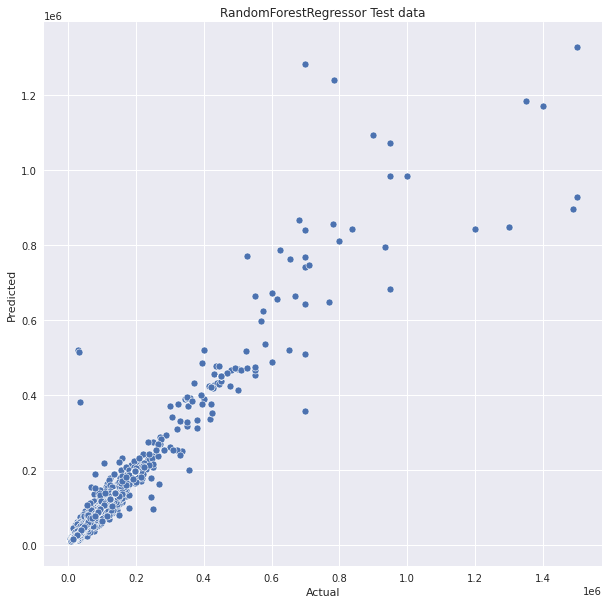

In [403]:
actual_vs_predicted(rfr_model,x_test, y_test, "RandomForestRegressor Test data")

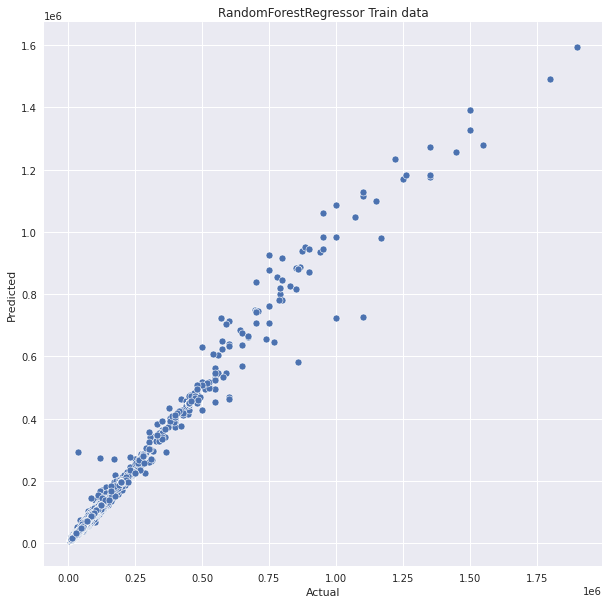

In [404]:
actual_vs_predicted(rfr_model,x_train, y_train, "RandomForestRegressor Train data")

# **Saving RandomForestRegressor model as file**

In [405]:
joblib.dump(rfr_model, 'RFR-Model')

['RFR-Model']

In [406]:
!ls

RFR-Model  __notebook_source__.ipynb
